In [1]:
pip install -U ultralytics opencv-python matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 23.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently ta

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
images_path = "/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val"
os.path.exists(images_path)

True

In [8]:
all_images = sorted(os.listdir(images_path))

sample_images = []
for img in all_images:
    full_path = os.path.join(images_path, img)
    if os.path.isfile(full_path):
        sample_images.append(full_path)
    if len(sample_images) == 5:
        break

len(sample_images), sample_images

(5,
 ['/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val/b1c66a42-6f7d68ca.jpg',
  '/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val/b1c81faa-3df17267.jpg',
  '/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val/b1c81faa-c80764c5.jpg',
  '/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val/b1c9c847-3bda4659.jpg',
  '/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/100k/val/b1ca2e5d-84cf9134.jpg'])

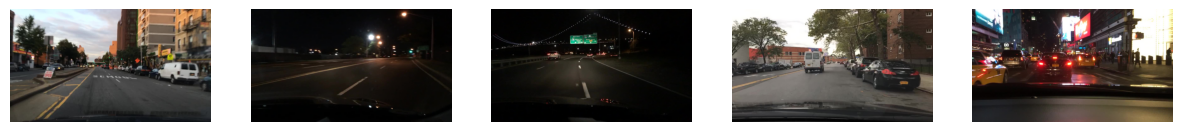

In [9]:
plt.figure(figsize=(15, 8))

for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [10]:
model = YOLO("yolov8n.pt")

In [11]:
results = model(sample_images)
len(results)


0: 384x640 12 cars, 1 truck, 84.5ms
1: 384x640 (no detections), 84.5ms
2: 384x640 1 car, 84.5ms
3: 384x640 15 cars, 1 bus, 84.5ms
4: 384x640 4 persons, 6 cars, 2 traffic lights, 84.5ms
Speed: 1.9ms preprocess, 84.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


5

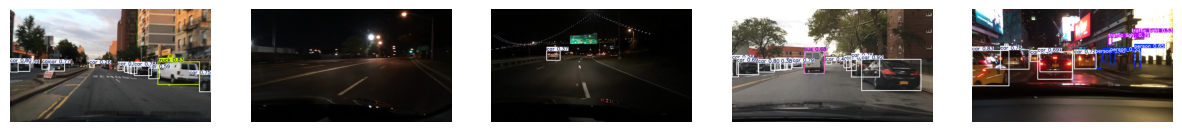

In [12]:
plt.figure(figsize=(15, 8))

for i, r in enumerate(results):
    annotated = r.plot()
    annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(annotated)
    plt.axis("off")

plt.show()

In [13]:
focal_length = 800.0

real_heights = {
    "person": 1.7,
    "car": 1.5,
    "traffic light": 1.0,
    "stop sign": 0.75
}

def estimate_distance(pixel_height, class_name):
    if class_name not in real_heights:
        return None
    if pixel_height <= 0:
        return None
    return (real_heights[class_name] * focal_length) / pixel_height


0: 384x640 12 cars, 1 truck, 86.1ms
Speed: 2.3ms preprocess, 86.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


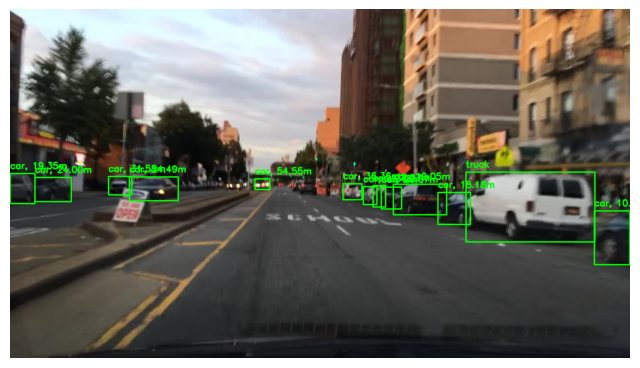

In [14]:
img = cv2.imread(sample_images[0])
result = model(img)[0]

for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    cls_name = model.names[cls_id]
    pixel_height = y2 - y1
    distance = estimate_distance(pixel_height, cls_name)
    if distance is not None:
        label = f"{cls_name}, {distance:.2f}m"
    else:
        label = cls_name
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, max(20, y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [15]:
output_dir = "/kaggle/working/outputs"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "final_result.jpg")
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

output_path

'/kaggle/working/outputs/final_result.jpg'